In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import math
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [117]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


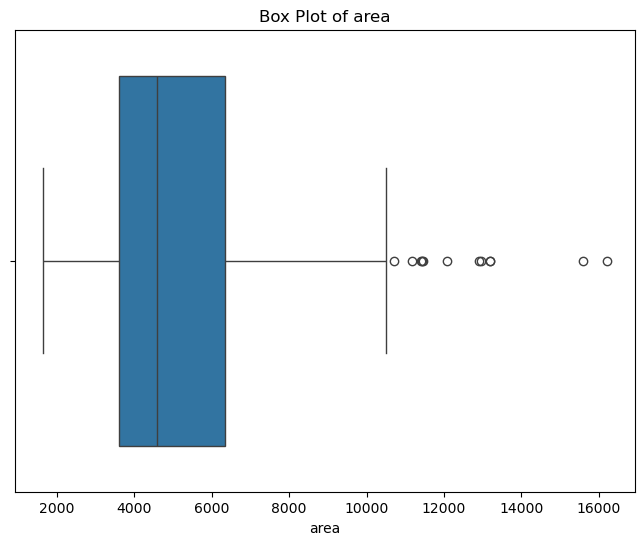

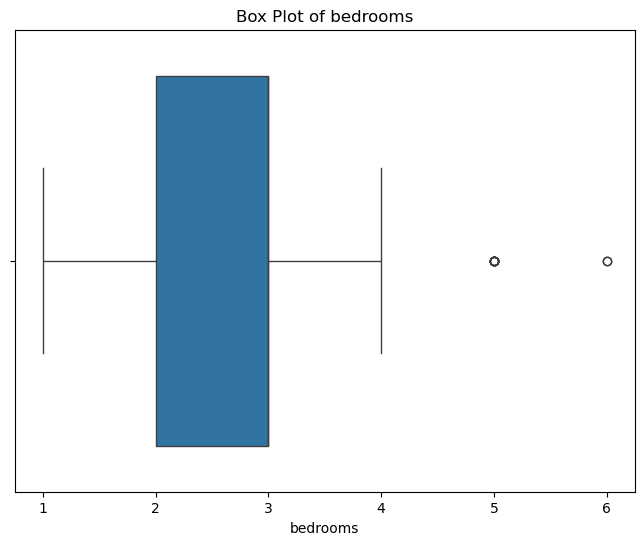

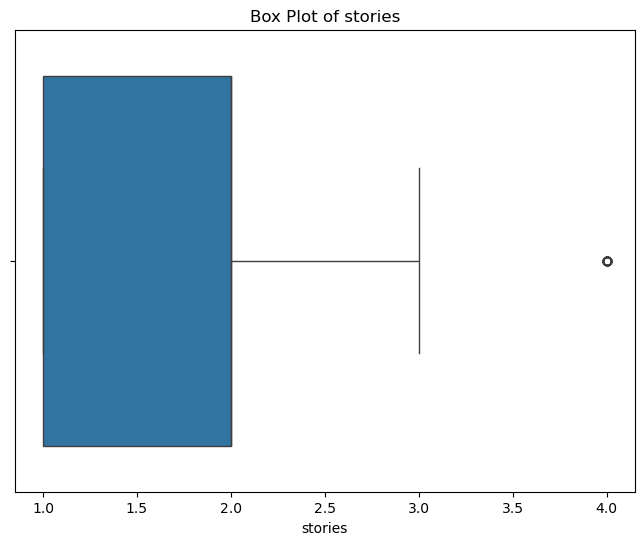

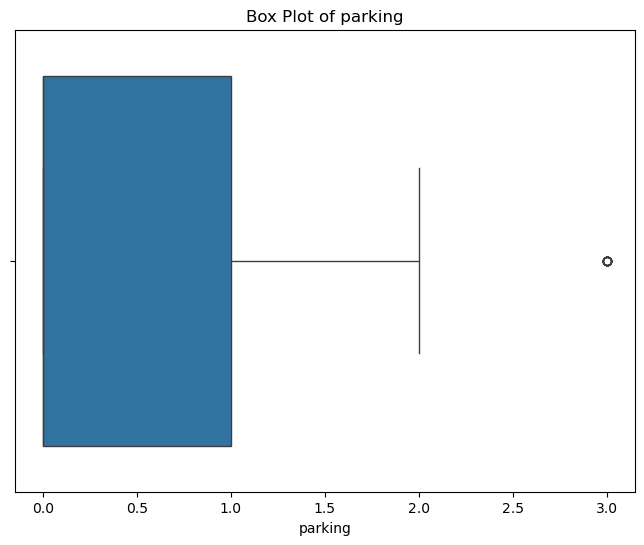

In [118]:
numerical_features = ['area', 'bedrooms', 'stories','parking']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = housing[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [119]:
# def remove_outliers(housing, column_name):
#     Q1 = housing[column_name].quantile(0.25)
#     Q3 = housing[column_name].quantile(0.75)
#     IQR = Q3-Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_filtered = housing[(housing[column_name]>=lower_bound) & (housing[column_name]<=upper_bound)]
#     return df_filtered

# for features in numerical_features:
#     housing = remove_outliers(housing, feature)
      

In [120]:
# numerical_features = ['area', 'bedrooms', 'stories','parking']
# for feature in numerical_features:
#     plt.figure(figsize=(8,6))
#     sns.boxplot(x = housing[feature])
#     plt.title(f'Box Plot of {feature}')
#     # plt.show()z

In [121]:
df_encoded = pd.get_dummies(housing, columns=['mainroad','furnishingstatus', 'guestroom', 'hotwaterheating', 'prefarea', 'basement', 'airconditioning'],drop_first=True)
print("Data after OneHotEncoding\n",df_encoded.head()) 


Data after OneHotEncoding
       price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                            False                         False   
1                            False                         False   
2                             True                         False   
3                            False                         False   
4                            False                         False   

   guestroom_yes  hotwaterheating_yes  prefarea_yes  basement_yes  \
0          False                False          Tru

In [122]:
#Feature Engineering/Iteraction regression
df_encoded['total_rooms'] = df_encoded['bedrooms'] + df_encoded['bathrooms'] + df_encoded['guestroom_yes'].astype(int)
df_encoded['price_per_sqft'] = df_encoded['price']/df_encoded['area']
df_encoded['area_air'] = df_encoded['area']*df_encoded['airconditioning_yes'].astype(int)

In [123]:
# temp = housing.drop(columns=[ 'furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])
X = df_encoded.drop(columns=['price'],axis=1)
Y = df_encoded['price']


In [124]:
X.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,guestroom_yes,hotwaterheating_yes,prefarea_yes,basement_yes,airconditioning_yes,total_rooms,price_per_sqft,area_air
0,7420,4,2,3,2,True,False,False,False,False,True,False,True,6,1792.452830,7420
1,8960,4,4,4,3,True,False,False,False,False,False,False,True,8,1367.187500,8960
2,9960,3,2,2,2,True,True,False,False,False,True,True,False,5,1229.919679,0
3,7500,4,2,2,3,True,False,False,False,False,True,True,True,6,1628.666667,7500
4,7420,4,1,2,2,True,False,False,True,False,False,True,True,6,1537.735849,7420


In [125]:
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [126]:
df_encoded.describe()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    int64  
 2   bedrooms                         545 non-null    int64  
 3   bathrooms                        545 non-null    int64  
 4   stories                          545 non-null    int64  
 5   parking                          545 non-null    int64  
 6   mainroad_yes                     545 non-null    bool   
 7   furnishingstatus_semi-furnished  545 non-null    bool   
 8   furnishingstatus_unfurnished     545 non-null    bool   
 9   guestroom_yes                    545 non-null    bool   
 10  hotwaterheating_yes              545 non-null    bool   
 11  prefarea_yes                     545 non-null    bool   
 12  basement_yes          

In [127]:
#Polynomial regression
poly = PolynomialFeatures(degree=2)
x_ploy = poly.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(x_ploy, Y, test_size = 0.2, random_state=42)


In [128]:
model = LinearRegression()

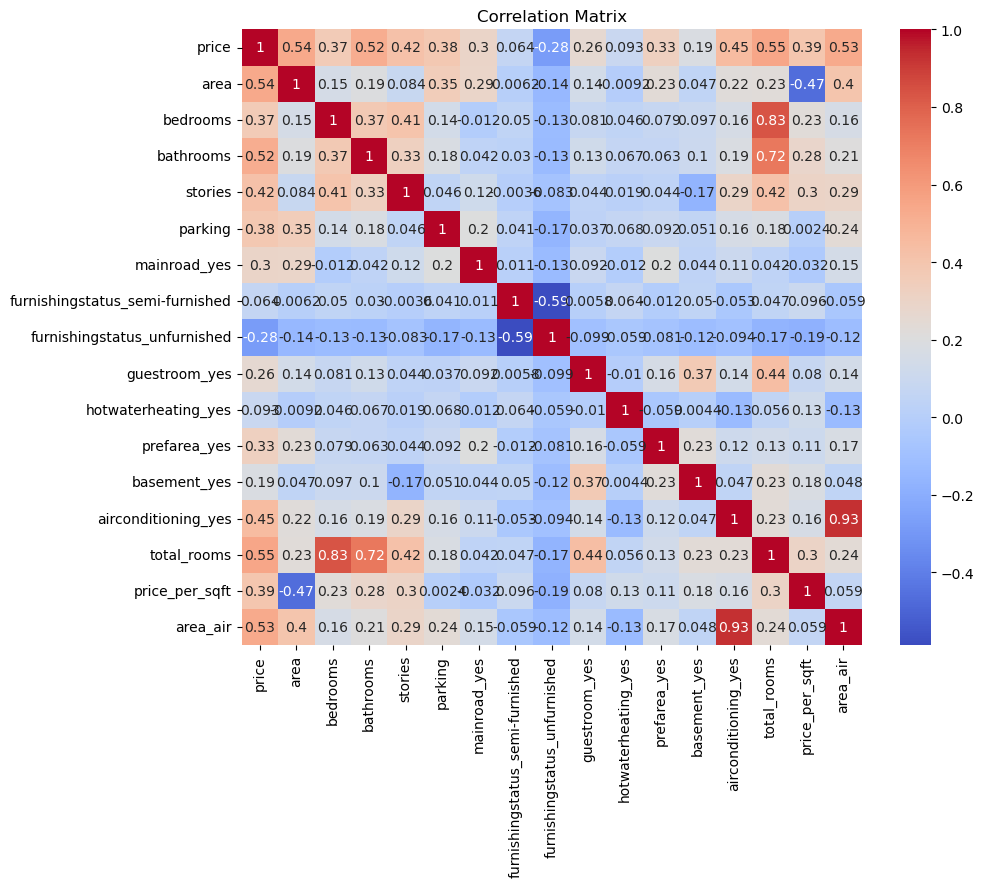

In [129]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

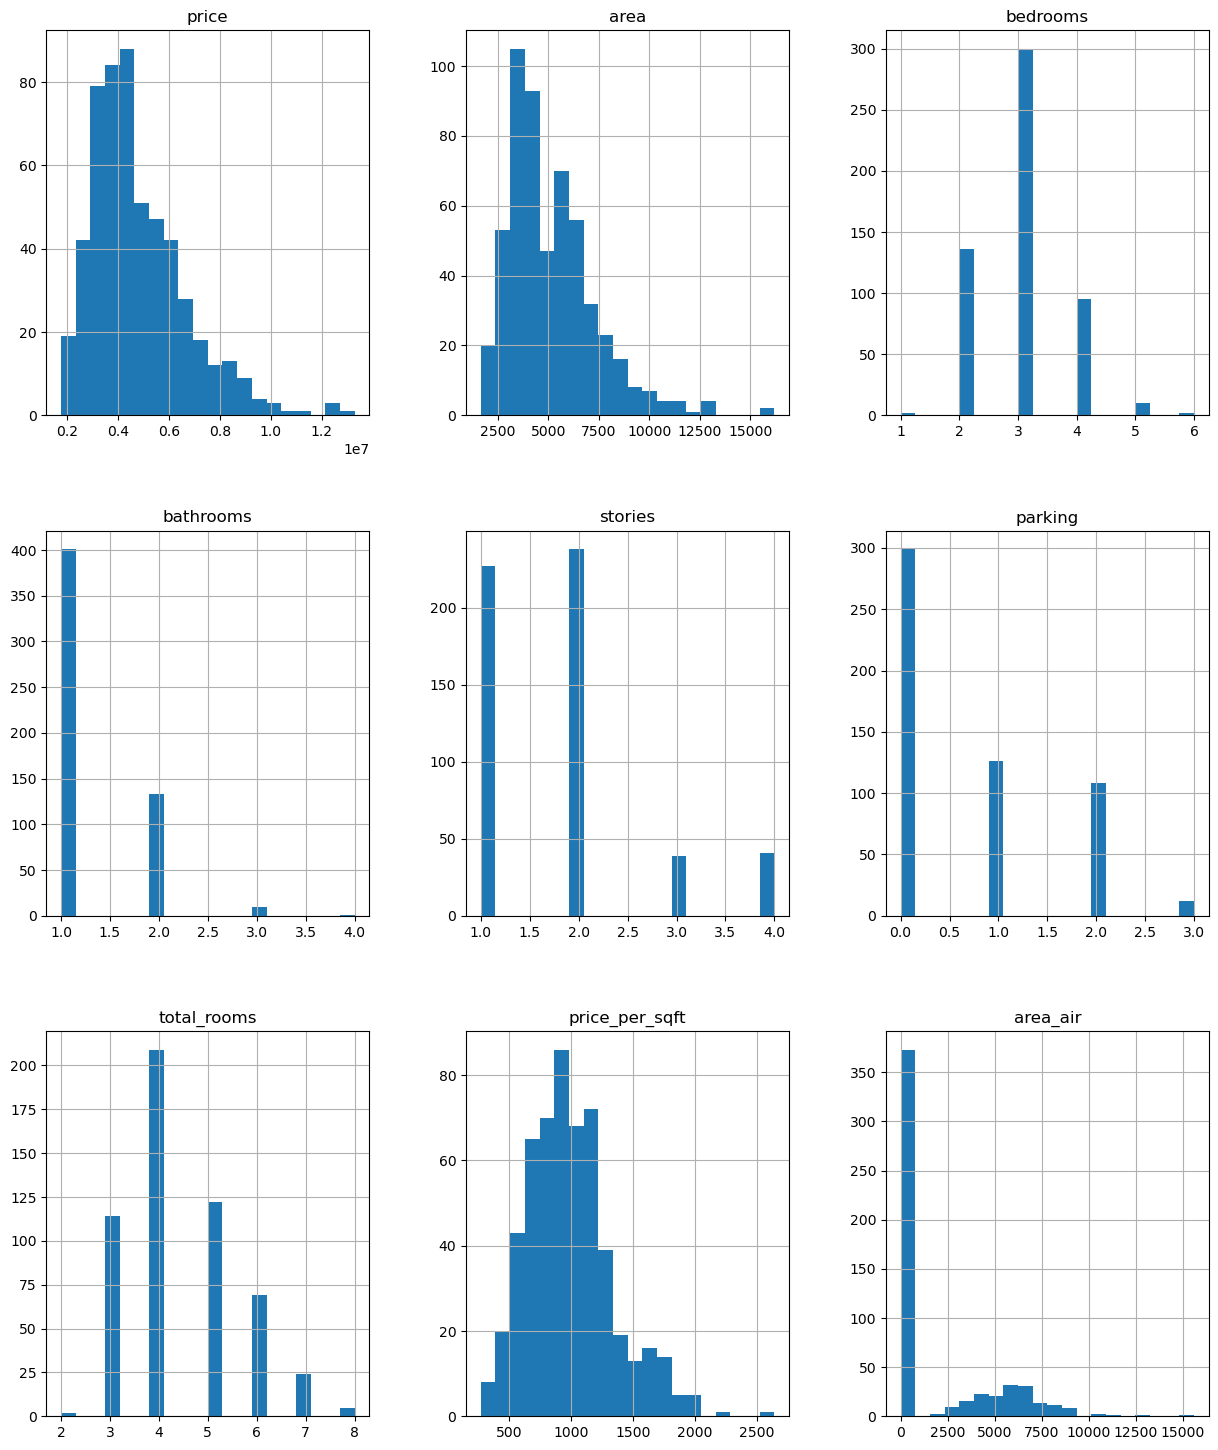

In [130]:
df_encoded.hist(figsize=(15,18), bins=20)
plt.show()

In [131]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [132]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [133]:
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [134]:
prediction = model.predict(X_test_scaled)
mse = mean_squared_error(Y_test,prediction)
mae = mean_absolute_error(Y_test,prediction)
rmse = root_mean_squared_error(Y_test,prediction)
r2 = r2_score(Y_test,prediction)

In [135]:
average_house_price = df_encoded['price'].mean()
print(f"Mean Absolute Error(MAE) : {mae:.2f}")
print(f"Mean Squared Error(MSE) :{mse:.2f} ")
print(f"Root Mean Squared Error(RMSE) :{rmse:.2f} ")
print(f"R-Square :{r2:.2f}")

Mean Absolute Error(MAE) : 418286.99
Mean Squared Error(MSE) :332942720586.59 
Root Mean Squared Error(RMSE) :577011.89 
R-Square :0.93
